In [24]:
import os 
import sys 
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.append(project_root)

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from src.model_utils import trainModel, tuneModel, save_params_to_json, saveModel
from src.preprocessor_utils import split_data, load_preprocessor
from src.pipeline_imbalanced import smote_pipeline , smote_under_pipeline
import joblib
from src.feature_engineering import FeatureEngineer
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score
from sklearn.model_selection import cross_val_score as cv_scores
from sklearn.metrics import confusion_matrix
import seaborn as sns



In [17]:
path_df = os.path.join(project_root, "data","data_train.csv")
print(path_df)
df = pd.read_csv(path_df)
x_raw,y_raw = split_data(df)

d:\PYTHON\data_mining\fraud-detection-post\data\data_train.csv


In [21]:
path_test = os.path.join(project_root,"data","data_test.csv")
df_test = pd.read_csv(path_test)
X_test,y_test = split_data(df_test)


In [19]:
path_pre_count = os.path.join(project_root,"models","Preprocess_count_data.pkl")
preprocess = joblib.load(path_pre_count)
path_prepro = os.path.join(project_root,"models","Preprocess_count_pipeline.pkl")
pre = joblib.load(path_prepro)

In [22]:

x_test = pre.transform(X_test)

d:\PYTHON\data_mining\fraud-detection-post\src\feature_engineering.py:19: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  X['key_note'] = temp_text.str.contains(pattern, case=False, na=False).astype(int)


In [5]:
# Kiểm tra kiểu dữ liệu
print("Type của preprocess:", type(preprocess))

# Nếu là tuple, xem nó dài bao nhiêu
if isinstance(preprocess, tuple):
    print("Độ dài tuple:", len(preprocess))
    print("Type phần tử thứ 0:", type(preprocess[0]))
    print("Type phần tử thứ 1:", type(preprocess[1]))
    
    # In thử nội dung (nếu không quá dài)
    print("Nội dung phần tử 0 (demo):", preprocess[0])

Type của preprocess: <class 'tuple'>
Độ dài tuple: 2
Type phần tử thứ 0: <class 'scipy.sparse._csr.csr_matrix'>
Type phần tử thứ 1: <class 'pandas.core.series.Series'>
Nội dung phần tử 0 (demo): <Compressed Sparse Row sparse matrix of dtype 'float64'
	with 2287086 stored elements and shape (14304, 5004)>
  Coords	Values
  (0, 1)	1.0
  (0, 31)	1.0
  (0, 49)	1.0
  (0, 101)	2.0
  (0, 104)	2.0
  (0, 111)	1.0
  (0, 121)	1.0
  (0, 126)	2.0
  (0, 130)	1.0
  (0, 131)	2.0
  (0, 144)	2.0
  (0, 145)	2.0
  (0, 212)	1.0
  (0, 266)	1.0
  (0, 272)	1.0
  (0, 363)	2.0
  (0, 374)	1.0
  (0, 398)	1.0
  (0, 452)	1.0
  (0, 518)	1.0
  (0, 520)	1.0
  (0, 531)	1.0
  (0, 580)	2.0
  (0, 591)	3.0
  (0, 621)	4.0
  :	:
  (14303, 3402)	1.0
  (14303, 3427)	1.0
  (14303, 3433)	2.0
  (14303, 3594)	1.0
  (14303, 3754)	1.0
  (14303, 3819)	1.0
  (14303, 4062)	1.0
  (14303, 4113)	1.0
  (14303, 4193)	2.0
  (14303, 4217)	1.0
  (14303, 4237)	1.0
  (14303, 4380)	1.0
  (14303, 4381)	1.0
  (14303, 4457)	1.0
  (14303, 4470)	2.0
 

In [6]:
x = preprocess[0]
y = preprocess[1]

In [ ]:
X_train,y_train = smote_pipeline(x,y)

In [ ]:
model = trainModel(X_train,y_train,"nb")

Training NB......
Train successful


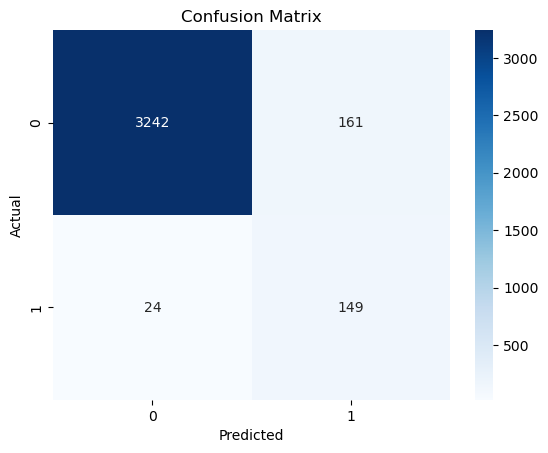

Cross-validation scores: <function cross_val_score at 0x0000027B40EE4E00>
Test set accuracy: 0.9482662192393736
Test set precision: 0.4806451612903226
Test set recall: 0.861271676300578
Test set F1 score: 0.6169772256728778


In [26]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print('Cross-validation scores:', cv_scores)
print('Test set accuracy:', accuracy)
print('Test set precision:', precision)
print('Test set recall:', recall)
print('Test set F1 score:', f1)